# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [1]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=")
       print(n_samples)
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

<Figure size 800x800 with 1 Axes>

The following is the program for plotting the dataset n.2

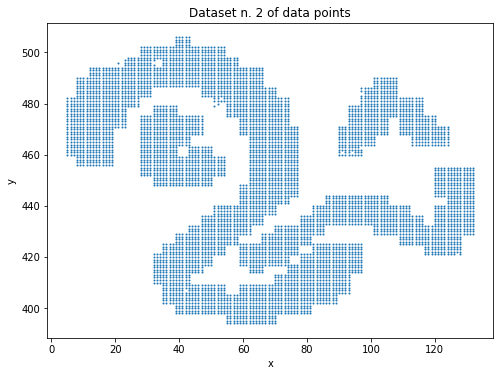

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

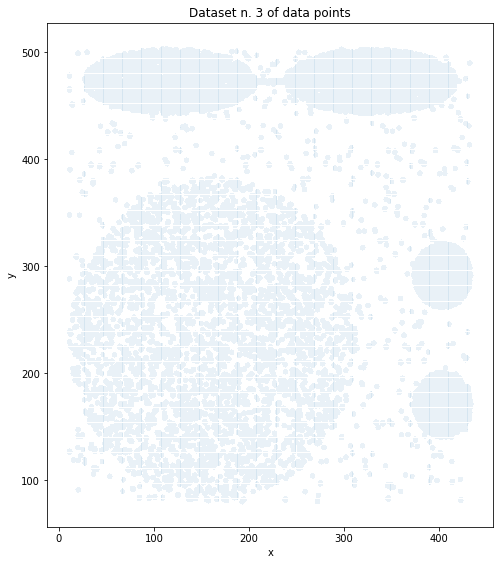

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [5]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

i=0
print(n_samples1, n_features1)

150 2


In the following program we plot the clusters

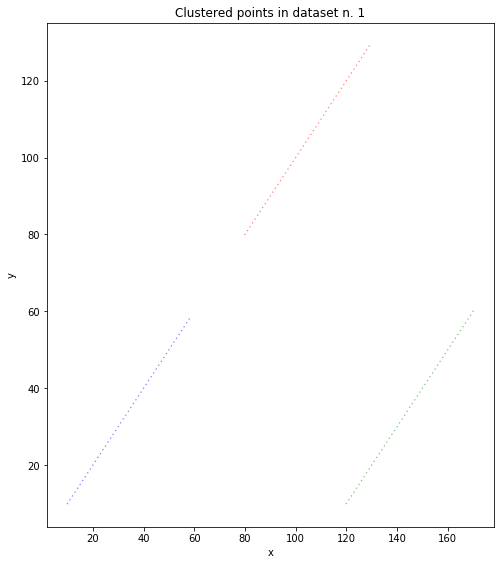

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell we perform clustering with K-means on dataset2

In [7]:
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)

In the following we plot clustering results on dataset2

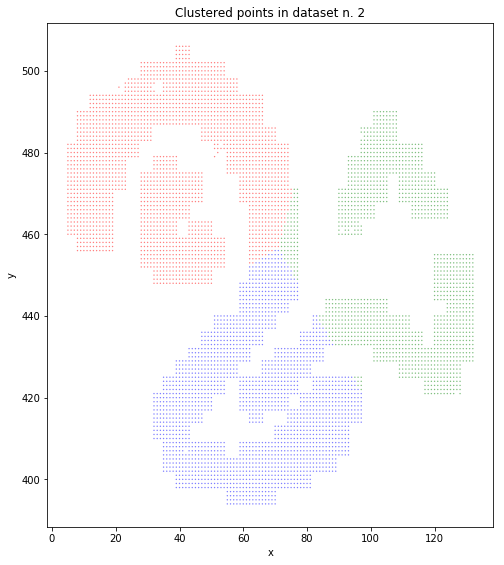

In [8]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 2')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','w']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

We perform clustering with K-means on the remaining dataset3

In [9]:
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
kmeans3 = KMeans(n_clusters=4, random_state=0).fit(data3)

In the following we plot clustering results on dataset3

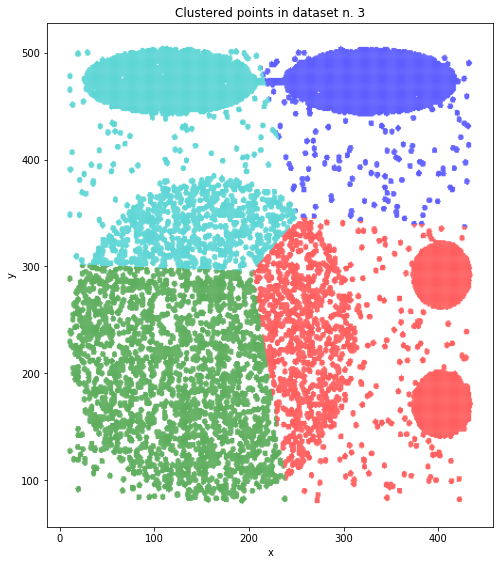

In [10]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 3')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k',(1.0, 1.0, 0.0)]
    
#plot the dataset
for clu in range(4):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [11]:
def get_clusters(k, data, cluster_labels):
    clusters = list()
    for c in range(k):
        labels = [i for i, e in enumerate(cluster_labels) if e == c]
        clusters.append([[data[i,0], data[i,1]] for i in labels])
    return clusters

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def make_silhouette(data, labels, k, plot_i):
    silhouette_avg = silhouette_score(data, labels)
    sample_silhouette_values = silhouette_samples(data, labels)
    
    y_lower = 10
    plt.subplot(5, 4, plot_i)
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    return silhouette_avg

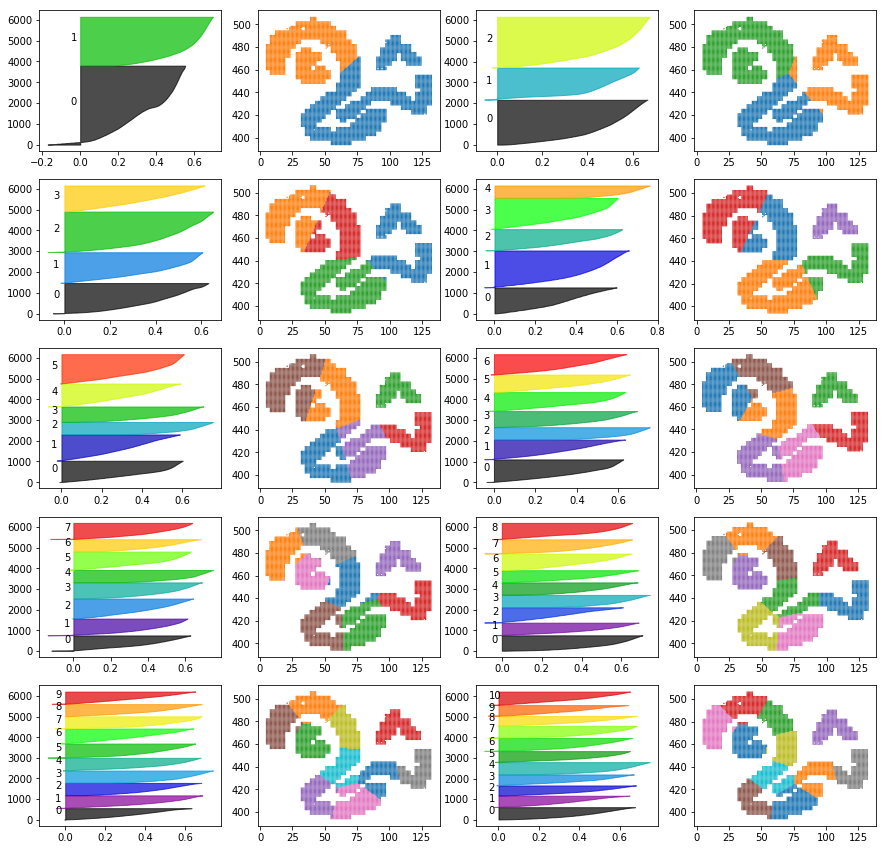

In [13]:
plt.figure(figsize=(15, 15))
scores = list()

i = 1
for k in range(2, 12):
    kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
    score = make_silhouette(data2, kmeans2.labels_, k, i)
    scores.append(score)
    
    clusters = get_clusters(k, data2, kmeans2.labels_)
    plt.subplot(5, 4, i+1)
    for c in clusters:
        x = [p[0] for p in c]
        y = [p[1] for p in c]
        plt.scatter(x, y, s=2, edgecolors='none')
    i += 2
plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with an increasing value of k (the number of clusters) so that the best value of k can be selected.

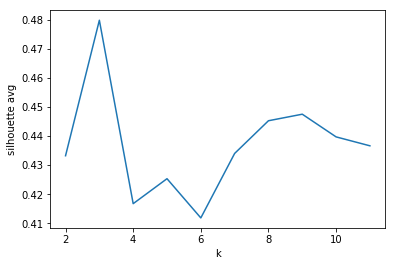

Best score 0.47978199225806895 k=3


In [14]:
plt.xlabel('k')
plt.ylabel('silhouette avg')
plt.plot([i for i in range(2, 12)], scores)
plt.show()

print("Best score {} k={}".format(np.max(scores), np.argmax(scores)+2))